In [1]:
import pandas as pd
import numpy as np
from utilsPtBr import Utils

dataPath = 'data/shortCorpus.csv'
dataFullPath = 'data/fullCorpus.csv'
df_uf = pd.read_csv(dataPath, sep=';')
df_full = pd.read_csv(dataFullPath, sep=';')
util = Utils()

In [2]:
dictDataframeTreino = {
    "tag": [],
    "text": [],
}

dictDataframeTeste = {
    "tag": [],
    "text": [], 
}

dictDataframeWithoutAnothersTreino = {
    "tag": [],
    "text": [],
}

dictDataframeWithoutAnothersTeste = {
    "tag": [],
    "text": [], 
}

dictFullframeTeste = {
    "tag": [],
    "text": [], 
}
dictFullWithoutAnothersframeTeste = {
    "tag": [],
    "text": [], 
}
formatTag = {
    "Publicação - Despacho / Decisão": 1,
    "Publicação - Sentença": 2,
    "Publicação - Audiência": 3,
}


In [3]:
from random import randint
def calcTestLineAleatory():
    numberAleatory = randint(0,99);
    if numberAleatory % 9 == 1: 
        return True;
    return False;

In [4]:
# pre formatando texto e separando treino e teste
vocabulary = {
    'UNKNOWN': 'UNKNOWN'
}

for i in range (len(df_uf.index)):
    tag = df_uf.loc[i].iloc[1]
    tag = formatTag.get(tag, 0)
  
    text = df_uf.loc[i].iloc[2]
    tokens = util.tokenize(text)
    for tok in set(tokens):
        if any(char.isdigit() for char in tok):
            vocabulary['NUMBER'] = tok
        else:  
            vocabulary[tok] = tok
    #freq = util.getPropoFreq(tokens)
  
    if calcTestLineAleatory():
        dictDataframeTeste['tag'].append(tag)
        dictDataframeTeste['text'].append(tokens)
    else:
        dictDataframeTreino['tag'].append(tag)
        dictDataframeTreino['text'].append(tokens)
    if tag != 0:
        if calcTestLineAleatory():
            dictDataframeWithoutAnothersTeste['tag'].append(tag)
            dictDataframeWithoutAnothersTeste['text'].append(tokens)
        else:
            dictDataframeWithoutAnothersTreino['tag'].append(tag)
            dictDataframeWithoutAnothersTreino['text'].append(tokens)     



In [5]:
vocabulary["UNKNOWN"] = "UNKNOWN"
print('size of vocanulary is ' + str(len(vocabulary.keys())) + ' words!')

word2index = {}
def get_word_2_index(vocab):
    isWord2index = {}
    for i,word in enumerate(vocab):
        if any(char.isdigit() for char in tok):
            isWord2index['NUMBER'] = i 
        else: 
            isWord2index[word] = i
    return isWord2index

word2index = get_word_2_index(vocabulary.keys())

print(word2index["UNKNOWN"])
def text_to_vector(tokens):
    totalUnknow = 0;
    layer = np.zeros(len(vocabulary.keys()),dtype=float)
    for word in tokens:
        index = word2index.get(word, word2index["UNKNOWN"])
        
        if any(char.isdigit() for char in word):
            index = word2index["NUMBER"]

        layer[index] += 1
        if index ==  word2index["UNKNOWN"]:
            totalUnknow += 1
#    if(totalUnknow> 0):        
#        print('total de palavras desconhecidas no vocabulario: ' + str(totalUnknow))
    return layer

size of vocanulary is 21216 words!
0


In [6]:
textsTreino = []
tagsTreino = []
textsTest = []
tagsTest = []
textsWOTreino = []
tagsWOTreino = []
textsWOTest = []
tagsWOTest = []

for i in range (len(dictDataframeTreino['text'])):
    textsTreino.append(text_to_vector(dictDataframeTreino['text'][i]))
    tagsTreino.append(dictDataframeTreino['tag'][i])

for i in range (len(dictDataframeTeste['text'])):
    textsTest.append(text_to_vector(dictDataframeTeste['text'][i]))
    tagsTest.append(dictDataframeTeste['tag'][i])

for i in range (len(dictDataframeWithoutAnothersTreino['text'])):
    textsWOTreino.append(text_to_vector(dictDataframeWithoutAnothersTreino['text'][i]))
    tagsWOTreino.append(dictDataframeWithoutAnothersTreino['tag'][i])

for i in range (len(dictDataframeWithoutAnothersTeste['text'])):
    textsWOTest.append(text_to_vector(dictDataframeWithoutAnothersTeste['text'][i]))
    tagsWOTest.append(dictDataframeWithoutAnothersTeste['tag'][i])


In [7]:
print('Total de amostras')
print('treino ' + str(len(tagsTreino)))
print('teste ' + str(len(tagsTest)))
print('treino sem outros ' + str(len(tagsWOTreino)))
print('teste sem outros ' + str(len(tagsWOTest)))


Total de amostras
treino 4705
teste 591
treino sem outros 3546
teste sem outros 427


In [8]:

from sklearnClass import SklClass

sklBoW = SklClass()

Vamos testar diferentes metodos de aprendizado supervisionado da biblioteca sklean e ver como eles se comportam com nossos dados. 

score:      75.973%
              precision    recall  f1-score   support

           0       0.60      0.62      0.61       135
           1       0.80      0.75      0.77       186
           2       0.77      0.75      0.76       152
           3       0.87      0.94      0.91       118

    accuracy                           0.76       591
   macro avg       0.76      0.77      0.76       591
weighted avg       0.76      0.76      0.76       591



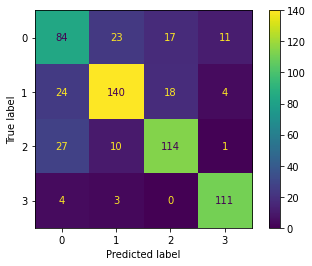

In [9]:

sklBoW.fitLinearRegretion(textsTreino, tagsTreino)
sklBoW.testLinearRegretion(textsTest, tagsTest)

score:      94.614%
              precision    recall  f1-score   support

           1       0.92      0.94      0.93       153
           2       0.94      0.92      0.93       142
           3       0.98      0.98      0.98       132

    accuracy                           0.95       427
   macro avg       0.95      0.95      0.95       427
weighted avg       0.95      0.95      0.95       427



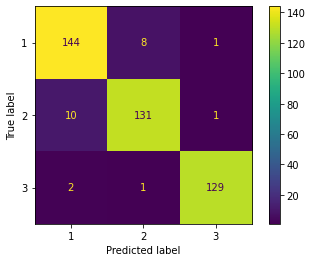

In [10]:
sklBoW.fitLinearRegretion(textsWOTreino, tagsWOTreino)
sklBoW.testLinearRegretion(textsWOTest, tagsWOTest)

score:      80.880%
              precision    recall  f1-score   support

           0       0.70      0.53      0.61       135
           1       0.82      0.84      0.83       186
           2       0.81      0.88      0.85       152
           3       0.87      0.98      0.92       118

    accuracy                           0.81       591
   macro avg       0.80      0.81      0.80       591
weighted avg       0.80      0.81      0.80       591



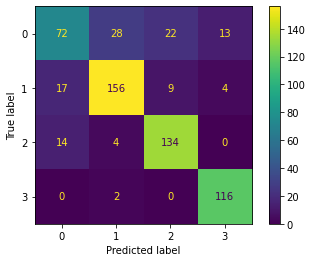

In [11]:
sklBoW.fitRandomForest(textsTreino, tagsTreino)
sklBoW.testRandomForest(textsTest, tagsTest)

score:      96.487%
              precision    recall  f1-score   support

           1       0.97      0.95      0.96       153
           2       0.94      0.96      0.95       142
           3       0.98      0.98      0.98       132

    accuracy                           0.96       427
   macro avg       0.97      0.97      0.97       427
weighted avg       0.97      0.96      0.96       427



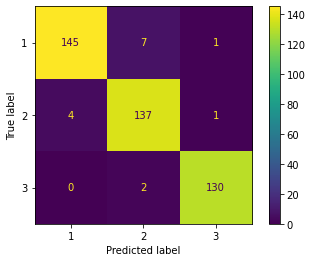

In [12]:
sklBoW.fitRandomForest(textsWOTreino, tagsWOTreino)
sklBoW.testRandomForest(textsWOTest, tagsWOTest)

score:      75.973%
              precision    recall  f1-score   support

           0       0.60      0.62      0.61       135
           1       0.80      0.75      0.77       186
           2       0.77      0.75      0.76       152
           3       0.87      0.94      0.91       118

    accuracy                           0.76       591
   macro avg       0.76      0.77      0.76       591
weighted avg       0.76      0.76      0.76       591



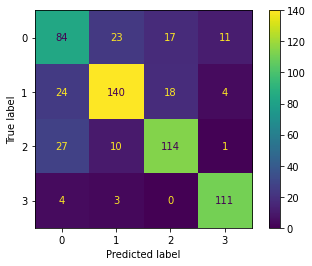

In [13]:
sklBoW.fitLogisticRegression(textsTreino, tagsTreino)
sklBoW.testLogisticRegression(textsTest, tagsTest)

score:      94.614%
              precision    recall  f1-score   support

           1       0.92      0.94      0.93       153
           2       0.94      0.92      0.93       142
           3       0.98      0.98      0.98       132

    accuracy                           0.95       427
   macro avg       0.95      0.95      0.95       427
weighted avg       0.95      0.95      0.95       427



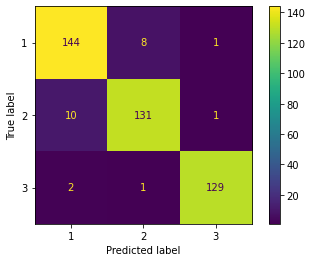

In [14]:
sklBoW.fitLogisticRegression(textsWOTreino, tagsWOTreino)
sklBoW.testLogisticRegression(textsWOTest, tagsWOTest)

score:      82.910%
              precision    recall  f1-score   support

           0       0.76      0.60      0.67       135
           1       0.84      0.84      0.84       186
           2       0.82      0.90      0.86       152
           3       0.88      0.97      0.93       118

    accuracy                           0.83       591
   macro avg       0.83      0.83      0.82       591
weighted avg       0.82      0.83      0.82       591



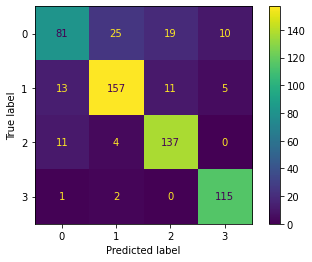

In [15]:
sklBoW.fitExtraTreesClassifier(textsTreino, tagsTreino)
sklBoW.testExtraTreesClassifier(textsTest, tagsTest)

score:      95.082%
              precision    recall  f1-score   support

           1       0.94      0.94      0.94       153
           2       0.94      0.96      0.95       142
           3       0.98      0.95      0.97       132

    accuracy                           0.95       427
   macro avg       0.95      0.95      0.95       427
weighted avg       0.95      0.95      0.95       427



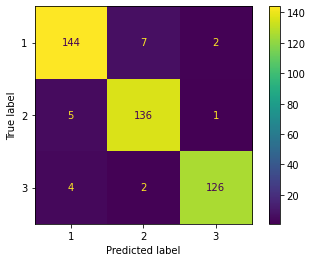

In [16]:
sklBoW.fitExtraTreesClassifier(textsWOTreino, tagsWOTreino)
sklBoW.testExtraTreesClassifier(textsWOTest, tagsWOTest)

score:      73.266%
              precision    recall  f1-score   support

           0       0.58      0.56      0.57       135
           1       0.73      0.74      0.73       186
           2       0.78      0.73      0.76       152
           3       0.84      0.92      0.88       118

    accuracy                           0.73       591
   macro avg       0.73      0.74      0.73       591
weighted avg       0.73      0.73      0.73       591



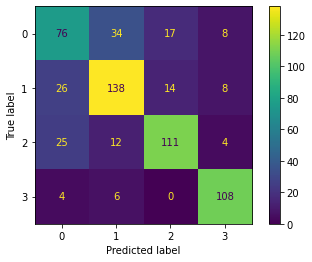

In [17]:
sklBoW.fitDecisionTreeClassifier(textsTreino, tagsTreino)
sklBoW.testDecisionTreeClassifier(textsTest, tagsTest)

score:      92.037%
              precision    recall  f1-score   support

           1       0.90      0.90      0.90       153
           2       0.90      0.91      0.90       142
           3       0.98      0.95      0.97       132

    accuracy                           0.92       427
   macro avg       0.92      0.92      0.92       427
weighted avg       0.92      0.92      0.92       427



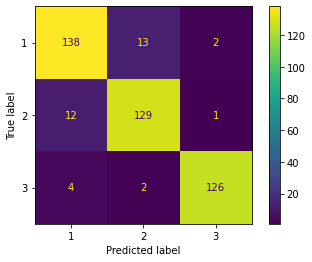

In [18]:
sklBoW.fitDecisionTreeClassifier(textsWOTreino, tagsWOTreino)
sklBoW.testDecisionTreeClassifier(textsWOTest, tagsWOTest)

score:      61.083%
              precision    recall  f1-score   support

           0       0.52      0.50      0.51       135
           1       0.67      0.54      0.60       186
           2       0.76      0.57      0.65       152
           3       0.54      0.91      0.68       118

    accuracy                           0.61       591
   macro avg       0.62      0.63      0.61       591
weighted avg       0.63      0.61      0.61       591



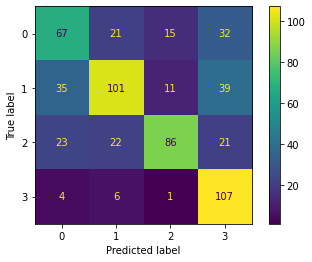

In [19]:
sklBoW.fitKNeighborsClassifier(textsTreino, tagsTreino)
sklBoW.testKNeighborsClassifier(textsTest, tagsTest)

score:      73.770%
              precision    recall  f1-score   support

           1       0.73      0.69      0.71       153
           2       0.90      0.61      0.73       142
           3       0.66      0.92      0.77       132

    accuracy                           0.74       427
   macro avg       0.76      0.74      0.74       427
weighted avg       0.76      0.74      0.73       427



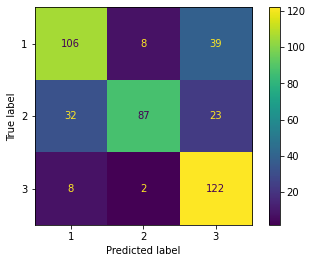

In [20]:
sklBoW.fitKNeighborsClassifier(textsWOTreino, tagsWOTreino)
sklBoW.testKNeighborsClassifier(textsWOTest, tagsWOTest)

score:      67.682%
              precision    recall  f1-score   support

           0       0.69      0.52      0.59       135
           1       0.69      0.67      0.68       186
           2       0.81      0.62      0.70       152
           3       0.58      0.95      0.72       118

    accuracy                           0.68       591
   macro avg       0.69      0.69      0.67       591
weighted avg       0.70      0.68      0.67       591



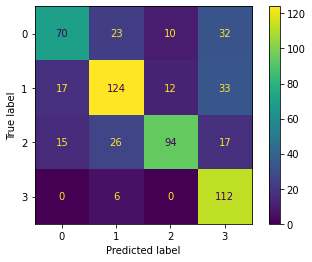

In [21]:
sklBoW.fitBaggingClassifier(textsTreino, tagsTreino)
sklBoW.testBaggingClassifier(textsTest, tagsTest)

score:      74.473%
              precision    recall  f1-score   support

           1       0.73      0.74      0.74       153
           2       0.92      0.56      0.69       142
           3       0.67      0.95      0.79       132

    accuracy                           0.74       427
   macro avg       0.78      0.75      0.74       427
weighted avg       0.78      0.74      0.74       427



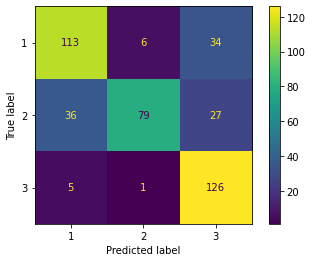

In [22]:
sklBoW.fitBaggingClassifier(textsWOTreino, tagsWOTreino)
sklBoW.testBaggingClassifier(textsWOTest, tagsWOTest)